# Redes Neuronales Recurrentes

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Preprocesado de datos

In [42]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv') # 2012-2016
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
dataset_train.shape

(1258, 6)

Seleccioanmos la variable predictora

In [85]:

training_set = dataset_train.loc[:,'Open']
print(training_set.shape)
type(training_set)

(1258,)


pandas.core.series.Series

Tenemos que pasar de formato pandas a numpy

In [86]:
training_set = dataset_train.loc[:,['Open']].values
print(training_set.shape)
print(type(training_set))

(1258, 1)
<class 'numpy.ndarray'>


## Escalar los datos: Normalization

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled[:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

## Crear una estructura de datos con 60 timesteps y 1 salida
- En cada momento del tiempo la red neuronal podrá mirar 60 pasos atrás en términos de memoria, en función de esos 60 días atrás queremos predecir cuál será el siguiente valor, a partir de los t-60 predecir el t+1
- Para este caso utilizamos un trimestres, tres meses de cotización para predecir el siguiente valor.


In [15]:
X_train = []
y_train = []

for i in range(60, training_set_scaled.size):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
X_train.shape

(1198, 60)

In [44]:
y_train.shape

(1198,)

## Añadimos otra dimensión en los datos de entrenamiento, variables predictoras.
- Hasta ahora solo hemos utilizado el valor de apertura de la acción. Pero se podrían utilizar más variables, como por ejemplo el precio de cierre
- Este cambio de dimensión lo realizaremos con ``np.reshape()``

In [19]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

# Construcción de la RNN

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


### Inicialización del la red

In [21]:
regressor = Sequential()

### Añadir las capas  LSTM y  regularización por Dropout

In [1]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

NameError: name 'regressor' is not defined

### Añadir la capa de salida

In [23]:
regressor.add(Dense(units=1))

### Compilar la RNN 

In [24]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Entrenamiento de la Red Neuronal Recurrente

In [25]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0536
Epoch 2/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 11s 10ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 11s

## Obtener el valor real de las acciones de enero de 2017 

In [26]:
# Enero 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv') 
real_stock_price = dataset_test.loc[:, ['Open']].values

In [27]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

# Predecir el valor de las acciones

In [28]:
dataset_total = pd.concat((dataset_train['Open'], 
                           dataset_test['Open']), 
                           axis=0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [29]:
# Para pasar de vector fila a vector columna
inputs = inputs.reshape(-1,1)

In [30]:
inputs = sc.transform(inputs)

Creamos la estructura de datos como lo hicimos con los de entrenamiento, para los valores de testing.

In [31]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Realizamos la predicción.

In [32]:
# Prediccion de los valores del mes de enero 
predicted_stock_price = regressor.predict(X_test)

# revertimos la normalizacion para ver el 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualizar los resultados

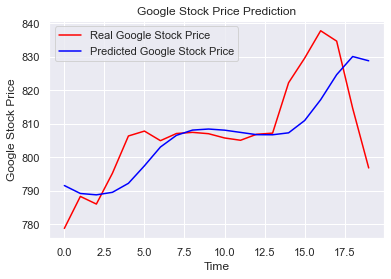

In [51]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Error absoluto medio de la predicción.

In [35]:
mean_absolute_error(predicted_stock_price, real_stock_price)

8.399832153320308

Valos promedio de las acciones el mes de Enero.

In [36]:
np.mean(real_stock_price)

807.5260000000001

El porcentaje de error sobre el valor de las acciones.

In [37]:
mean_absolute_error(predicted_stock_price, real_stock_price) / np.mean(real_stock_price)

0.01040193399756826

Calcularmos el rrror de cada dia de enero y lo graficamos.

In [38]:
error = predicted_stock_price - real_stock_price

Text(0, 0.5, 'Prediction error')

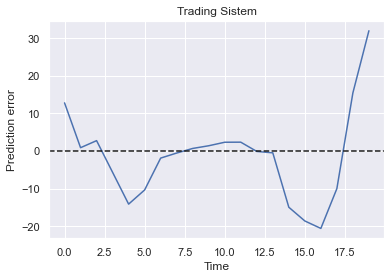

In [59]:
plt.plot(error)
plt.axhline(y=0, xmin=0, xmax=20, ls='--', color='k')
plt.title('Trading Sistem')
plt.xlabel('Time')
plt.ylabel('Prediction error')